In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('original.csv')

In [4]:
df.info

<bound method DataFrame.info of         id  Marital status  Application mode  Application order  Course  \
0        1               1                17                  5     171   
1        2               1                15                  1    9254   
2        3               1                 1                  5    9070   
3        4               1                17                  2    9773   
4        5               2                39                  1    8014   
...    ...             ...               ...                ...     ...   
4419  4420               1                 1                  6    9773   
4420  4421               1                 1                  2    9773   
4421  4422               1                 1                  1    9500   
4422  4423               1                 1                  1    9147   
4423  4424               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0    

In [5]:
df.shape


(4424, 38)

In [6]:
df.size

168112

In [7]:
df.dtypes

id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u

In [8]:
#data cleaning

In [9]:
df.isna().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [10]:
#checking for outliers

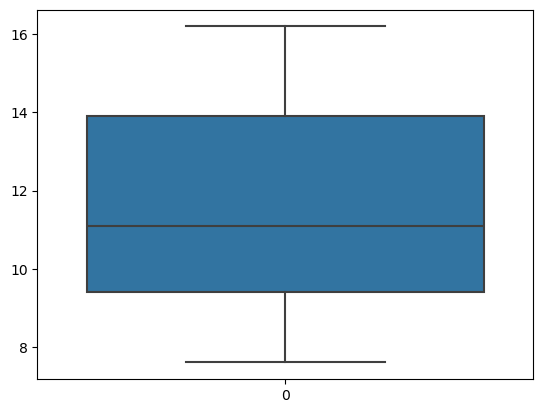

In [12]:
sns.boxplot(df['Unemployment rate']);

In [28]:
#funtion to return upper bound, lower bound

def st(data):
    q1 = np.percentile( data , 75)
    q2 = np.percentile( data , 25)
    q1, q2

    iqr = q1 - q2

    ub = q1 + (1.5 * iqr)
    lb = q1 - (1.5 * iqr)

    return ub ,lb

In [25]:
ub, lb = st(df['Unemployment rate'])

In [26]:
ub


20.65

In [27]:
lb

7.15

In [28]:
# filtering the data without outliers
df = df[(df['Unemployment rate'] <= ub) & (df['Unemployment rate'] >= lb)]

In [30]:
#loan defaulters

In [31]:
df = pd.read_csv('application_data.csv')

In [33]:
df.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

In [34]:
df.shape

(307511, 122)

In [35]:
df.size

37516342

In [36]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [37]:
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [38]:
# checking for outliers

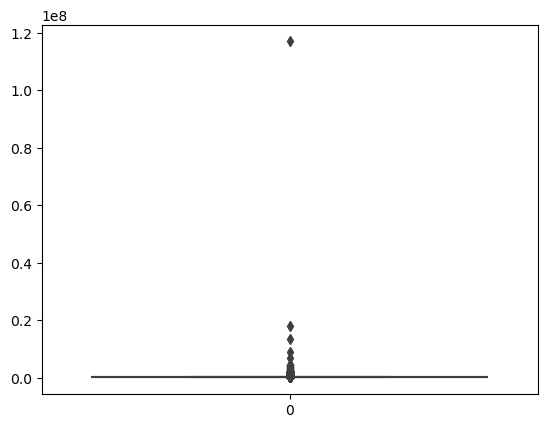

In [40]:
sns.boxplot(df['AMT_INCOME_TOTAL']);

In [42]:
ub, lb = st(df['AMT_INCOME_TOTAL'])

In [43]:
ub


337500.0

In [44]:
lb

67500.0

In [45]:
#filtering data

df = df[(df['AMT_INCOME_TOTAL'] <= ub) & (df['AMT_INCOME_TOTAL'] >= lb)]

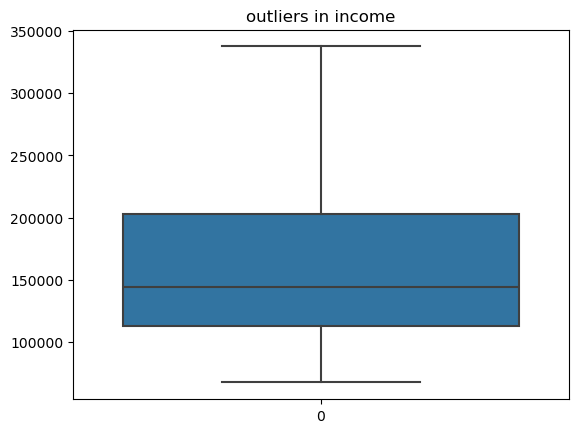

In [46]:
sns.boxplot(df['AMT_INCOME_TOTAL']);
plt.title('outliers in income');

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
#EDA -> music

In [17]:
df = pd.read_csv('all_stats_t_series.csv')

In [18]:
df.info

<bound method DataFrame.info of                 id  viewCount  likeCount  favoriteCount  commentCount
0      c_VrTcIY8kA     233296    82028.0              0       13239.0
1      GHyHfi7fnGQ      81592     4432.0              0         535.0
2      SIN9YUhH6cU      31523     1436.0              0         209.0
3      tPRge7PMVeM      45149      997.0              0         127.0
4      UlrZOaT8ays      26186     2108.0              0          42.0
...            ...        ...        ...            ...           ...
19853  8r0wy9zP0oU       1614       13.0              0           0.0
19854  UWdnsdc6Bkc      47818       76.0              0           6.0
19855  ZlGlZGIomZM       3756       30.0              0           2.0
19856  bo9EkevW6iw     116365      823.0              0          15.0
19857  HqnOYybRrSQ        631        9.0              0           3.0

[19858 rows x 5 columns]>

In [19]:
df.size

99290

In [20]:
df.shape

(19858, 5)

In [21]:
df.columns

Index(['id', 'viewCount', 'likeCount', 'favoriteCount', 'commentCount'], dtype='object')

In [22]:
df.dtypes

id                object
viewCount          int64
likeCount        float64
favoriteCount      int64
commentCount     float64
dtype: object

In [23]:
df.isna().sum()

id                0
viewCount         0
likeCount        14
favoriteCount     0
commentCount     16
dtype: int64

In [24]:
#checking for outliers

<Axes: >

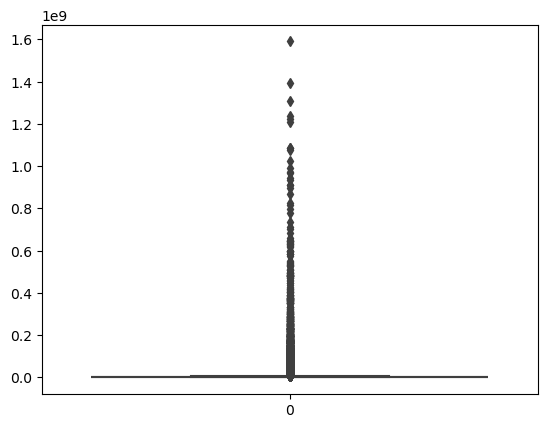

In [25]:
sns.boxplot(df['viewCount'])

In [29]:
ub, lb = st(df['viewCount'])

In [30]:
ub

6775871.0

In [31]:
lb

-1254140.5

In [32]:
#filtering data

In [33]:
df = df[(df['viewCount'] <= ub) & (df['viewCount'] >= lb)]

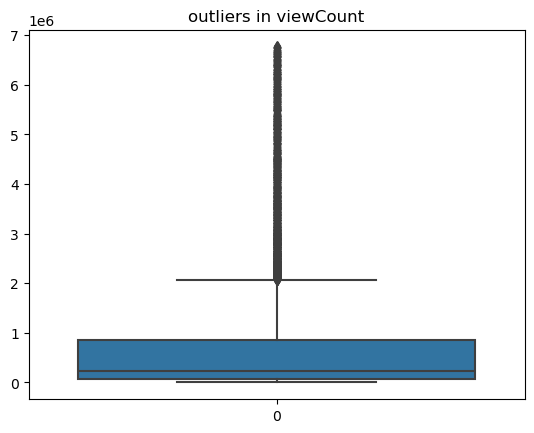

In [35]:
sns.boxplot(df['viewCount']);
plt.title('outliers in viewCount');